In [1]:
%load_ext autoreload
%autoreload 2
from src.data_processing import load_data
import itertools
import string

In [71]:
from src.ngrams import *
from src.string_similarity import levenshtein
import operator
from src.data_processing import print_progress
from nltk import word_tokenize, pos_tag
from src.ngrams import get_three_gram_wildcard
from collections import defaultdict

In [5]:
task1, task2, task3, min_pairs, strings, pun_strings = load_data()

In [4]:
ngram_frequencies = json.load(open("data/ngram_frequencies.json"))
task2_frequencies = [n for i, n in enumerate(ngram_frequencies) if task1[i]['pun']]

In [6]:
def window_compression(threshold):
    count = 0
    target_counts = [0] * len(task2)
    total_ngrams = 0
    for i, trigrams in enumerate(task2_frequencies):
        increment = False
        total_ngrams += len(trigrams)
        for trigram in trigrams:
            if trigram[1] <= threshold:
                target_counts[i] += 1
    #         print(trigram)
            if task2[i]['target'] in trigram[0] and trigram[1] <= threshold:
                increment = True
        count += int(increment)

#     print("Windows containing pun: ", count / len(task2))
#     print("Average continaing ngrams: ", sum(target_counts) / len(task2))
#     print("Average ngrams: ", total_ngrams / len(task2))

    return count / len(task2), sum(target_counts) / len(task2)

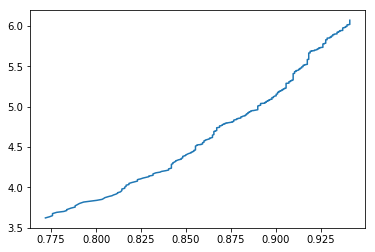

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
cr = [window_compression(i) for i in range(1001)]
plt.plot([c[0] for c in cr], [c[1] for c in cr])

In [ ]:
for i, c in enumerate(task1):
    freqs = []
    context = c['words']
    print_progress(i, len(task1))
    for i in range(1, len(context)-1):
        freqs.append((context[i-1:i+2], three_gram_frequency(context[i-1:i+2])))
    
    three_gram_frequencies.append(freqs)

 |███████████████████████████████████████████████-----------------------------------------------------| 46.8% 

KeyboardInterrupt: 

ERROR:tornado.general:Uncaught exception, closing connection.
Traceback (most recent call last):
  File "/home/doogy/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/doogy/.local/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/doogy/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/doogy/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/doogy/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 421, in execute_request
    self._abort_queues()
  File "/home/doogy/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 637, in _abort_queues
    self._abort_queue(stream)
  File "/home/doogy/.local/lib/python3.5/site-packages/ipyk

In [5]:
test_freqencies = [{'frequencies': t2} for t2 in task2_frequencies]
for i, t in enumerate(task2):
    test_freqencies[i]['text'] = t['words']
    test_freqencies[i]['target'] = t['target']

In [10]:
accepted_pos = {'ADV', 'ADJ', 'VERB', 'NOUN'}
def ngram_search(index):
    context = test_freqencies[index]
    threshold = 0
    res = {}
    print(index)
    pos_text = pos_tag(context['text'], tagset='universal')
    for i, (trigram, freq) in enumerate(context['frequencies']):
        if freq <= threshold and pos_text[i+1][1] in accepted_pos:
            res[(trigram[1], i+1, freq)] = get_three_gram_wildcard(trigram[0], trigram[2])
    return res

In [7]:
from multiprocessing import Pool
p = Pool(4)
ngram_search_space = p.map(ngram_search, range(len(test_freqencies)))

240
80
160
0
161
81
82
162
241
163
83
242
164
243
1
2
3
165
4
5
6
166
167
7
8
9
10
84
244
/home/doogy/Data/ngrams/3grams/c1/symbols/..gz
11
245
12
13
14
246
168
169
85
86
87
88
89
90
/home/doogy/Data/ngrams/3grams/c1/symbols/:.gz
/home/doogy/Data/ngrams/3grams/c1/symbols/..gz
247
170
/home/doogy/Data/ngrams/3grams/c1/symbols/;.gz
171
248
15
16
17
91
172
249
250
173
92
18
251
252
253
174
19
20
254
175
176
177
178
179
21
22
255
93
94
95
23
96
97
180
98
181
256
182
257
99
258
259
260
183
24
/home/doogy/Data/ngrams/3grams/c1/symbols/..gz
25
26
27
184
28
185
100
186
187
188
189
101
29
30
31
32
190
33
34
/home/doogy/Data/ngrams/3grams/c1/symbols/?.gz
35
102
191
103
192
193
194
195
196
261
197
198
199
200
104
105
262
106
107
108
36
37
38
39
201
40
/home/doogy/Data/ngrams/3grams/c1/symbols/?.gz
109
202
203
/home/doogy/Data/ngrams/3grams/c1/symbols/..gz
204
205
41
263
42
264
110
111
112
113
206
43
44
265
114
115
266
207
116
208
209
210
211
/home/doogy/Data/ngrams/3grams/c1/symbols/..gz
117
118


1187
1188
1189
1190
1191
1262
1263
1264
1265
1192
1193
1266
1194
1195
1196
1197
1267
1268
1269
1270
1198
1199
/home/doogy/Data/ngrams/3grams/c1/symbols/..gz


In [11]:
new_search_space = []
for context in ngram_search_space:
    current = []
    for k, v in context.items():
        current.append((k, v))
    new_search_space.append(current)

In [7]:
with open("data/ngram_search_space.json", 'w') as f:
    json.dump(new_search_space, f)

In [11]:
ngram_search(0)

NameError: name 'test_freqencies' is not defined

In [12]:
task1[0]

{'pun': True,
 'words': ["'",
  "'",
  'I',
  "'",
  'm',
  'halfway',
  'up',
  'a',
  'mountain',
  ',',
  "'",
  "'",
  'Tom',
  'alleged',
  '.']}

In [82]:
accepted_pos = {'ADV', 'ADJ', 'VERB', 'NOUN'}
def generate_list(index):
    context = task1[index]
    words = context['words']
    threshold = 0
    res = defaultdict(dict)
    pos_text = pos_tag(words, tagset='universal')
    for i in range(1, len(pos_text)-2):
        if pos_text[i+1][1] not in accepted_pos:
            continue
        original_frequency = ngram_frequency(words[i:i+3])
        if  original_frequency > 10000:
            continue
        try:
            res[' '.join(words[i:i+3])]['original_frequency'] = original_frequency
            res[' '.join(words[i:i+3])]['substitutions'] = get_three_gram_wildcard(words[i], words[i+2])
        except:
            res[' '.join(words[i:i+3])] = "miss"
    with open("data/ngram_searchspace/{}".format(index), 'w') as f:
        json.dump(res, f, indent=4)
    return res

In [85]:
from multiprocessing import Pool
p = Pool(4)
ngram_search_space = p.map(generate_list, range(len(task1)))

/home/doogy/Data/ngrams/3grams/c1/symbols/..gz
/home/doogy/Data/ngrams/3grams/c1/symbols/..gz
/home/doogy/Data/ngrams/3grams/c1/symbols/:.gz
/home/doogy/Data/ngrams/3grams/c1/symbols/..gz
/home/doogy/Data/ngrams/3grams/c1/symbols/;.gz
/home/doogy/Data/ngrams/3grams/c1/symbols/:.gz
/home/doogy/Data/ngrams/3grams/c1/symbols/..gz
/home/doogy/Data/ngrams/3grams/c1/symbols/?.gz
/home/doogy/Data/ngrams/3grams/c1/lower/8/_only.gz
/home/doogy/Data/ngrams/3grams/c1/symbols/:.gz
/home/doogy/Data/ngrams/3grams/c1/symbols/..gz
/home/doogy/Data/ngrams/3grams/c1/symbols/:.gz
/home/doogy/Data/ngrams/3grams/c1/symbols/?.gz
/home/doogy/Data/ngrams/3grams/c1/symbols/:.gz
/home/doogy/Data/ngrams/3grams/c1/symbols/..gz
/home/doogy/Data/ngrams/3grams/c1/symbols/;.gz
/home/doogy/Data/ngrams/3grams/c1/lower/5/0/_only.gz
/home/doogy/Data/ngrams/3grams/c1/symbols/<.gz
/home/doogy/Data/ngrams/3grams/c1/symbols/>.gz
/home/doogy/Data/ngrams/3grams/c1/symbols/<.gz
/home/doogy/Data/ngrams/3grams/c1/symbols/>.gz
/ho

In [36]:
ngram_frequency("t like a".split())

1397

In [37]:
ngram_frequency("at the orifice".split())

2876

In [38]:
ngram_frequency("the orifice .".split())

6518

In [68]:
get_three_gram_wildcard("the", ".")

{'the " .': 148833,
 'the # .': 10994,
 'the $ .': 8669,
 'the % .': 1931,
 'the & .': 1686,
 'the &EII; .': 299,
 'the &PSVI; .': 51,
 'the &quot; .': 86,
 "the ' .": 46986,
 "the '' .": 1719,
 "the '00 .": 50,
 "the '00s .": 1577,
 "the '01 .": 153,
 "the '02 .": 227,
 "the '03 .": 382,
 "the '04 .": 386,
 "the '04s .": 52,
 "the '05 .": 642,
 "the '05s .": 83,
 "the '06 .": 791,
 "the '060 .": 48,
 "the '06s .": 90,
 "the '1 .": 161,
 "the '15 .": 65,
 "the '2 .": 117,
 "the '20 .": 62,
 "the '20s .": 4386,
 "the '20th .": 116,
 "the '3 .": 62,
 "the '30s .": 8978,
 "the '360 .": 53,
 "the '386 .": 43,
 "the '4 .": 79,
 "the '40 .": 53,
 "the '400 .": 111,
 "the '40s .": 6809,
 "the '45 .": 504,
 "the '47 .": 57,
 "the '49 .": 44,
 "the '49ers .": 123,
 "the '50 .": 96,
 "the '500 .": 90,
 "the '50s .": 22727,
 "the '51 .": 77,
 "the '53 .": 65,
 "the '54 .": 43,
 "the '55 .": 176,
 "the '56 .": 64,
 "the '57 .": 159,
 "the '58 .": 52,
 "the '59 .": 85,
 "the '60 .": 137,
 "the '60s